# Facebook Prophet Forecast

## Load in Data

In [21]:
import pandas as pd
from prophet import Prophet

In [2]:
import warnings; 
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [5]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [6]:
print(df['Product'].unique())

[2667437]


In [7]:
df['Store'].unique()

array(['QLD_CW_ST0203'], dtype=object)

## Data Pre-processing

In [8]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

### Processing Dates

In [9]:
#Spliting Time Date column into different columns based on the year, month and day
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])

In [10]:
df

,Time Date,Product,Store,Value,Year,Month,Day
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5
...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15


In [11]:
#Concatenating date columns 
df['Dates'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [12]:
df

,Time Date,Product,Store,Value,Year,Month,Day,Dates
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5,2018-01-05
...,...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15


In [13]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
Dates        datetime64[ns]
dtype: object

### Dropping Columns

In [14]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [15]:
df

,Value,Dates
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


### Renaming Columns for Facebook Prophet Model

In [16]:
df.columns = ['y', 'ds']

In [17]:
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


## Training Model

In [18]:
pt = Prophet(interval_width=0.95, daily_seasonality=True)

model = pt.fit(df)

19:34:13 - cmdstanpy - INFO - Chain [1] start processing
19:34:13 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [19]:
#Creating a new dataframe with extra periods defined by the day
future = pt.make_future_dataframe(periods=100,freq='D')

#Forecasting using the predict function on the future dataframe
forecast = pt.predict(future)

#New dataframe with forecasted periods
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,863.910038,4016.452585,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,787.164481,3974.929688,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,896.514480,3900.249467,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,921.306241,3997.896770,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,871.543534,4085.961383,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.903162,2150.012136,5373.606627,4234.623532,4241.446672,-509.966196,-509.966196,-509.966196,472.568897,...,16.615617,16.615617,16.615617,-999.150710,-999.150710,-999.150710,0.0,0.0,0.0,3727.936966
1176,2021-03-23,4238.989539,2036.720017,5368.010388,4235.660057,4242.589172,-527.435391,-527.435391,-527.435391,472.568897,...,-11.291430,-11.291430,-11.291430,-988.712858,-988.712858,-988.712858,0.0,0.0,0.0,3711.554148
1177,2021-03-24,4240.075916,2026.227044,5299.993356,4236.683281,4243.753897,-512.907214,-512.907214,-512.907214,472.568897,...,-4.423866,-4.423866,-4.423866,-981.052245,-981.052245,-981.052245,0.0,0.0,0.0,3727.168702
1178,2021-03-25,4241.162293,2172.484240,5335.663402,4237.668897,4244.930281,-481.684909,-481.684909,-481.684909,472.568897,...,22.497946,22.497946,22.497946,-976.751752,-976.751752,-976.751752,0.0,0.0,0.0,3759.477383
1179,2021-03-26,4242.248670,2154.483904,5311.621668,4238.675281,4246.102789,-538.306508,-538.306508,-538.306508,472.568897,...,-34.566066,-34.566066,-34.566066,-976.309339,-976.309339,-976.309339,0.0,0.0,0.0,3703.942162


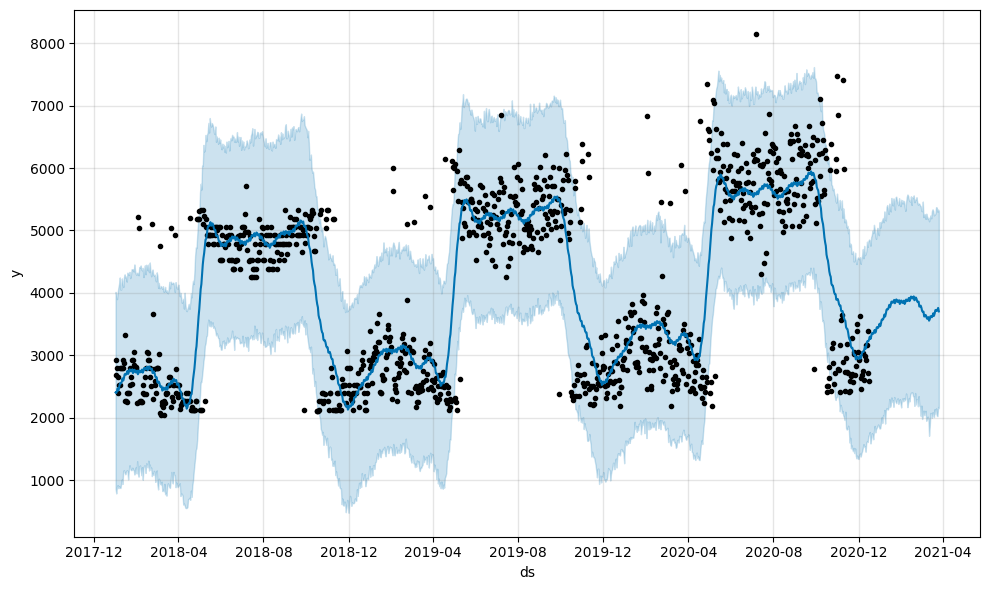

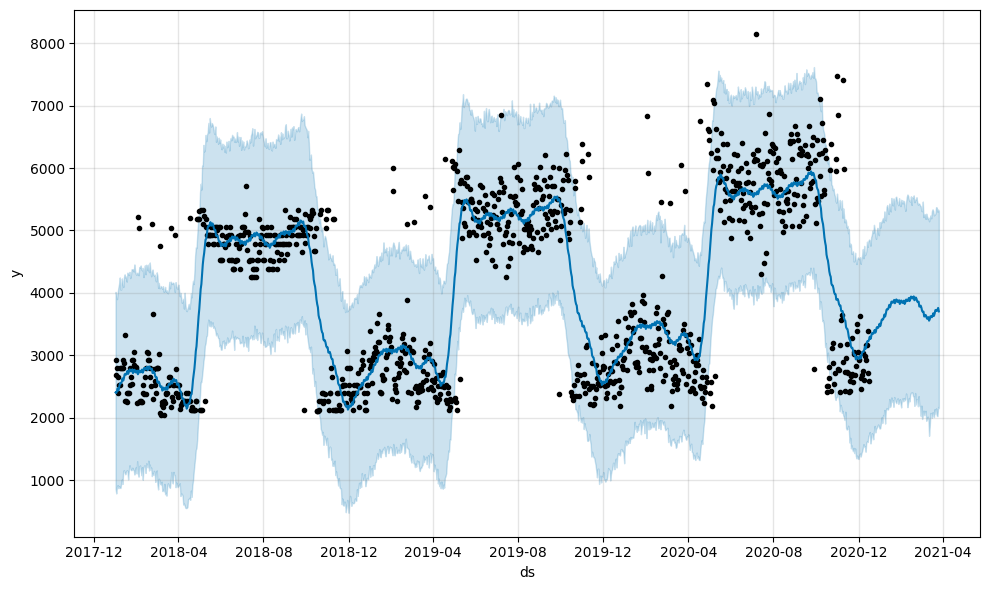

In [22]:
pt.plot(forecast)

### Decomposing Trend

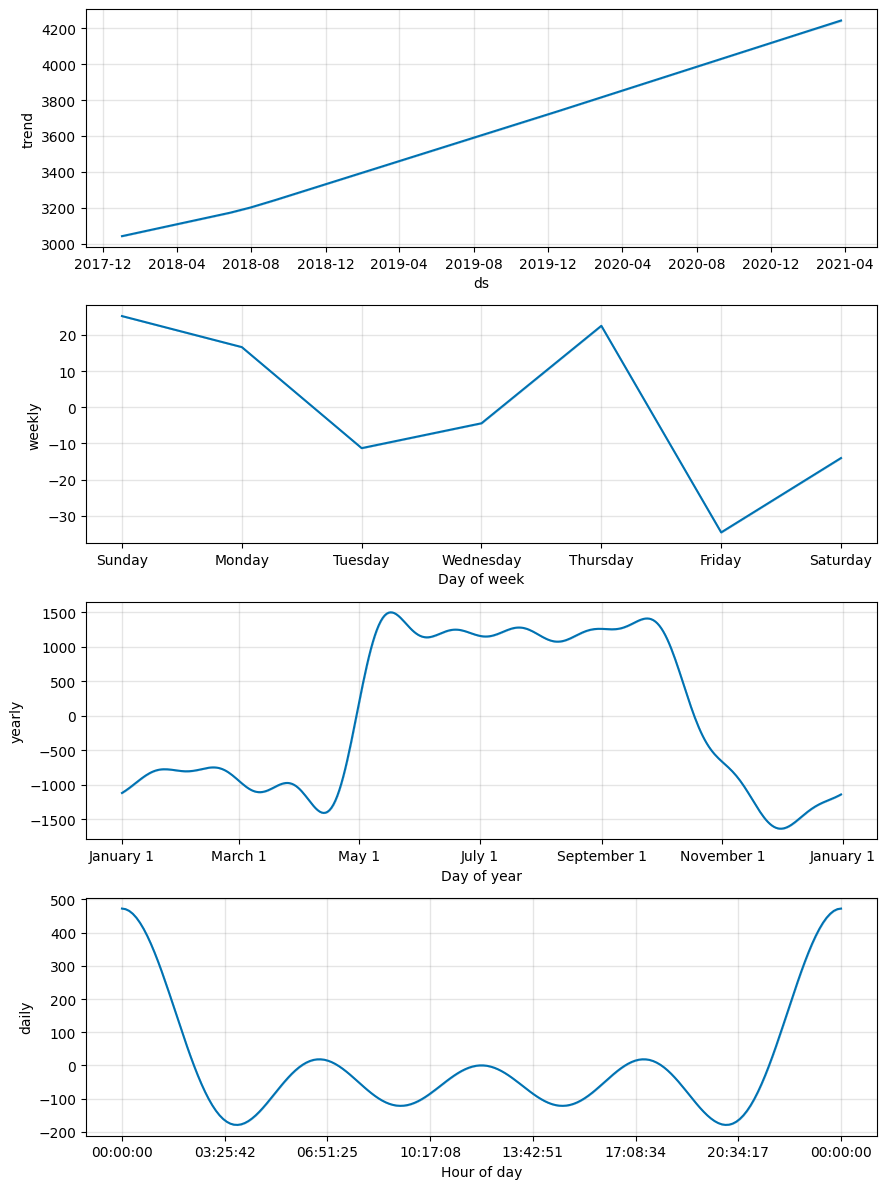

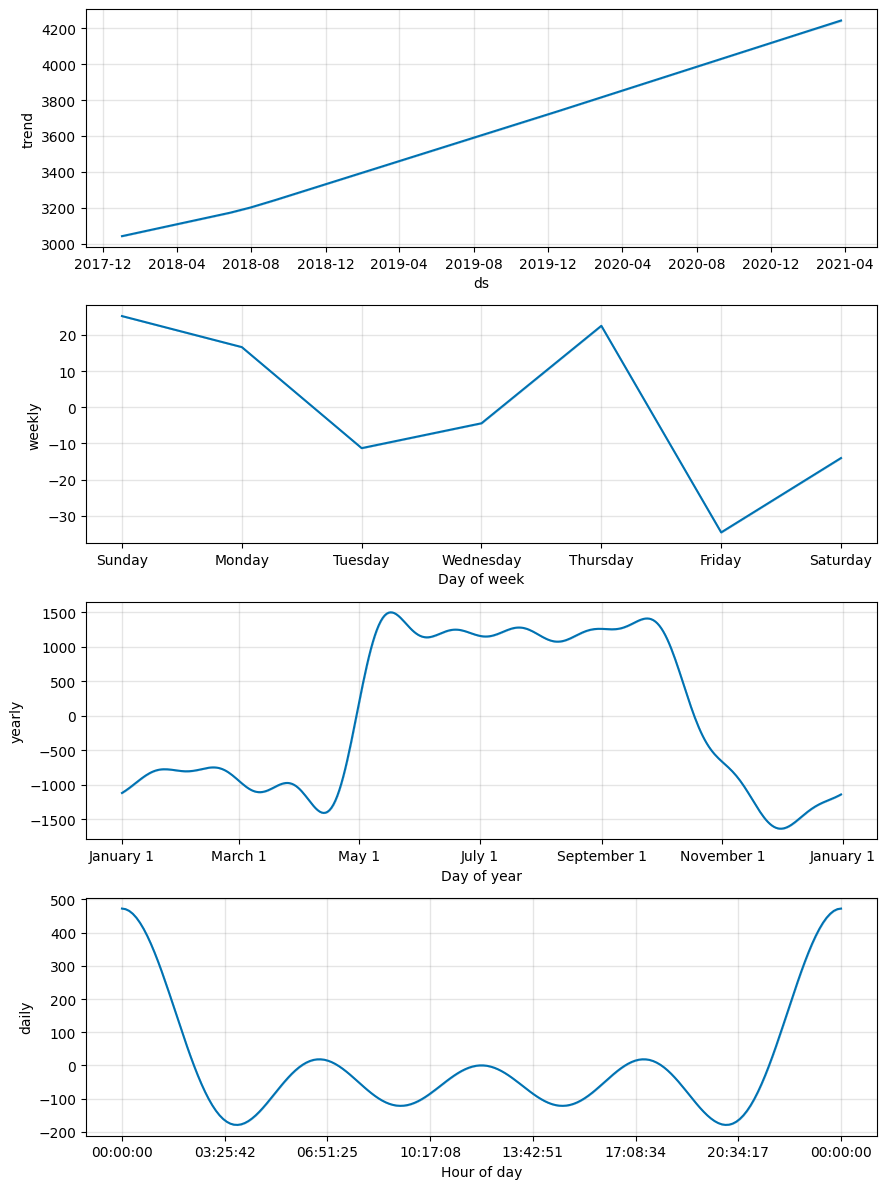

In [24]:
pt.plot_components(forecast)